In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Testing

In [14]:
df = pd.read_csv("./Android-Apps/try.csv")

In [15]:
model = tf.keras.models.load_model("./new-model-0.1.1")

In [16]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 2)                 5         
 tion)                                                           
                                                                 
 dense_30 (Dense)            (None, 64)                192       
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 6)                 390       
                                                                 
Total params: 4747 (18.55 KB)
Trainable params: 4742 (18.52 KB)
Non-trainable params: 5 (24.00 Byte)
_________________________________________________________________


In [17]:
labels = df.pop("Content Rating")
features = df

In [ ]:
"""
0 - 0
1 - 7
2 - 10
3 - 13
3 - 17
4 - 18
"""

In [25]:
preds = model.predict([[10,2]])
preds = map(lambda x: np.argmax(x), preds)
preds = list(preds)

1/1 [==============================] - 0s 27ms/step


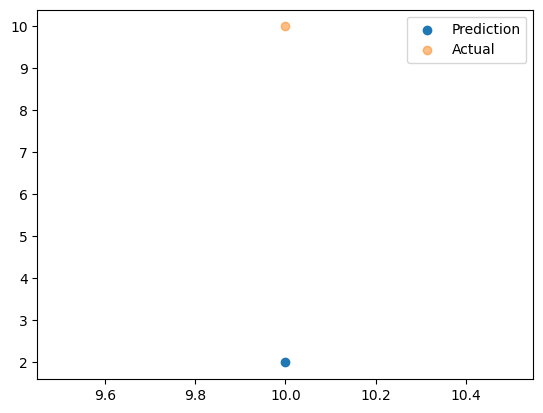

In [26]:
# plt.scatter(features["Age"][:20], preds, label="Prediction")
# plt.scatter(features["Age"][:20], labels[:20], label="Actual", alpha=0.5)
# plt.legend()

plt.scatter([10], preds, label="Prediction")
plt.scatter([10], [], label="Actual", alpha=0.5)
plt.legend()

In [20]:
converter = tf.lite.TFLiteConverter.from_saved_model("./new-model-0.1.1")
tflite_model = converter.convert()

2023-10-24 13:26:58.102759: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-10-24 13:26:58.102778: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-10-24 13:26:58.103882: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./new-model-0.1.1
2023-10-24 13:26:58.105265: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-10-24 13:26:58.105271: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: ./new-model-0.1.1
2023-10-24 13:26:58.107006: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-10-24 13:26:58.107730: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-10-24 13:26:58.143843: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: ./new-model-0.1.1
2023

In [25]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)